### Part 1 : Weighted Chebyshev Apriori

In [179]:
# creation of the scalarizing function

def evaluate_chebyshev(objective_vector,refference_vector):
    ideal_vector = [-1000,-40]
    chebyshev_eval = []
    for i in range(len(objective_vector)):
        chebyshev_eval.append(refference_vector[i]*(objective_vector[i]-ideal_vector[i]))
    return max(chebyshev_eval)

def evaluate_obj1(x1,x2):
    return (x1)**3 + (x2)**2

def evaluate_obj2(x1,x2):
    return (x2)**2 - 4*(x1)

def scalarizing_function(x):
    x1,x2 = x
    z_ideal = [-1000,-40]
    z_nadir = [1000,40]
    objective_vector = [evaluate_obj1(x1,x2),evaluate_obj2(x1,x2)]
    objective_vector_normalized = [(objective_vector[0]-z_ideal[0])/(z_nadir[0]-z_ideal[0]),
                                   (objective_vector[1]-z_ideal[1])/(z_nadir[1]-z_ideal[1])]
    
        #print('Objective Vector is {0} and scalar value is {1} '.format(objective_vector_normalized,
                                                                    #evaluate_chebyshev(objective_vector_normalized,[0.5, 0.5])))
    return evaluate_chebyshev(objective_vector_normalized,[0.5, 0.5])



In [180]:
# calling the optimizer for weight [0.5,0.5]
import numpy as np
from scipy import optimize
from scipy.optimize import Bounds
bounds = Bounds(-10,10)
res = optimize.differential_evolution(func=scalarizing_function,bounds=[(-10,10),(-10,10)])

In [181]:
print('Decision vector corresponding to the optimal soln is {0} and its objective vector is {1}'.format(res.x,
                                                                            [evaluate_obj1(res.x[0],res.x[1])
                                                                             ,evaluate_obj2(res.x[0],res.x[1])]))

Decision vector corresponding to the optimal soln is [-10.          -0.01314769] and its objective vector is [-999.999827138213, 40.00017286178698]


In [95]:
# creation of the scalarizing function

def evaluate_chebyshev(objective_vector,refference_vector):
    ideal_vector = [-1000,-40]
    chebyshev_eval = []
    for i in range(len(objective_vector)):
        chebyshev_eval.append(refference_vector[i]*(objective_vector[i]-ideal_vector[i]))
    return max(chebyshev_eval)

def evaluate_obj1(x1,x2):
    return (x1)**3 + (x2)**2

def evaluate_obj2(x1,x2):
    return (x2)**2 - 4*(x1)

def scalarizing_function(x1,x2):
    z_ideal = [-1000,-40]
    z_nadir = [1000,40]
    objective_vector = [evaluate_obj1(x1,x2),evaluate_obj2(x1,x2)]
    objective_vector_normalized = [(objective_vector[0]-z_ideal[0])/(z_nadir[0]-z_ideal[0]),
                                   (objective_vector[1]-z_ideal[1])/(z_nadir[1]-z_ideal[1])]
    
    #print('Objective Vector is {0} and scalar value is {1} '.format(objective_vector_normalized,
                                                                    #evaluate_chebyshev(objective_vector_normalized,[0.5, 0.5])))
    return evaluate_chebyshev(objective_vector_normalized,[0.7, 0.3])



In [86]:
# calling for weights [0.7, 0.3]
bounds_1 = Bounds(-10,10)
first_guess = [-1, 9]
res_2 = optimize.differential_evolution(scalarizing_function,bounds=[(-10,10),(-10,10)])

In [87]:
print('Decision vector corresponding to the optimal soln is {0} and its objective vector is {1}'.format(res_2.x,
                                                                            [evaluate_obj1(res_2.x[0],res_2.x[1])
                                                                             ,evaluate_obj2(res_2.x[0],res_2.x[1])]))

Decision vector corresponding to the optimal soln is [-10.         -0.0146332] and its objective vector is [-999.9997858694845, 40.00021413051547]


In [156]:
import numpy as np
def evaluate_chebyshev(objective_vector,refference_vector):
    ideal_vector = [0,0]
    chebyshev_eval = []
    for i in range(len(objective_vector)):
        chebyshev_eval.append(refference_vector[i]*(objective_vector[i]-ideal_vector[i]))
    return np.max(chebyshev_eval,axis=0)

def evaluate_obj1(x1,x2):
    return (x1)**3 + (x2)**2

def evaluate_obj2(x1,x2):
    return (x2)**2 - 4*(x1)

def scalarizing_function(x1,x2):
    z_ideal = [-1000,-40]
    z_nadir = [1000,40]
    objective_vector = [evaluate_obj1(x1,x2),evaluate_obj2(x1,x2)]
    objective_vector_normalized = [(objective_vector[0]-z_ideal[0])/(z_nadir[0]-z_ideal[0]),
                                   (objective_vector[1]-z_ideal[1])/(z_nadir[1]-z_ideal[1])]
    
    #print('Objective Vector is {0} and scalar value is {1} '.format(objective_vector_normalized,
                                                                    #evaluate_chebyshev(objective_vector_normalized,[0.5, 0.5])))
    return evaluate_chebyshev(objective_vector_normalized,[0.7, 0.3])


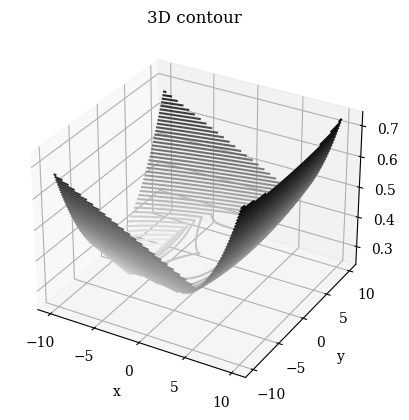

In [157]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
Z=[]
x1 = np.linspace(-10,10,1000)
x2 = np.linspace(-10,10,1000)
X, Y = np.meshgrid(x1, x2)
Z = scalarizing_function(X,Y)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(x1, x2, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('3D contour')
plt.show()

In [154]:
# creation of the scalarizing function

def weighted_sum_approach(objective_vector,refference_vector):
    weighted_sum = np.dot(objective_vector,refference_vector)
    return weighted_sum


def evaluate_obj1(x1,x2):
    return (x1)**3 + (x2)**2

def evaluate_obj2(x1,x2):
    return (x2)**2 - 4*(x1)

def scalarizing_function_weighted_sum(x1,x2):
    z_ideal = [-1000,-40]
    z_nadir = [1000,40]
    objective_vector = [evaluate_obj1(x1,x2),evaluate_obj2(x1,x2)]
    objective_vector_normalized = [(objective_vector[0]-z_ideal[0])/(z_nadir[0]-z_ideal[0]),
                                   (objective_vector[1]-z_ideal[1])/(z_nadir[1]-z_ideal[1])]
    
    #print('Objective Vector is {0} and scalar value is {1} '.format(objective_vector_normalized,
    #evaluate_chebyshev(objective_vector_normalized,[0.5, 0.5])))
    return weighted_sum_approach(objective_vector_normalized,[0.7, 0.3])



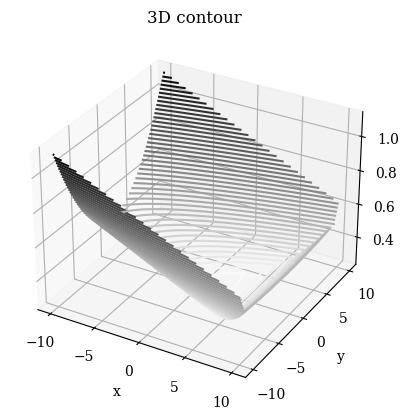

In [155]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
x1 = np.linspace(-10,10,1000)
x2 = np.linspace(-10,10,1000)
X, Y = np.meshgrid(x1, x2)
Z = scalarizing_function(X,Y)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(x1, x2, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('3D contour')
plt.show()

### Part 1 : Weighted Sum

In [23]:
# creation of the scalarizing function

def weighted_sum_approach(objective_vector,refference_vector):
    weighted_sum = np.dot(objective_vector,refference_vector)
    return weighted_sum


def evaluate_obj1(x1,x2):
    return (x1)**3 + (x2)**2

def evaluate_obj2(x1,x2):
    return (x2)**2 - 4*(x1)

def scalarizing_function_weighted_sum(x):
    x1,x2 = x
    z_ideal = [-1000,-40]
    z_nadir = [1000,40]
    objective_vector = [evaluate_obj1(x1,x2),evaluate_obj2(x1,x2)]
    objective_vector_normalized = [(objective_vector[0]-z_ideal[0])/(z_nadir[0]-z_ideal[0]),
                                   (objective_vector[1]-z_ideal[1])/(z_nadir[1]-z_ideal[1])]
    
    #print('Objective Vector is {0} and scalar value is {1} '.format(objective_vector_normalized,
                                                                    #evaluate_chebyshev(objective_vector_normalized,[0.5, 0.5])))
    return weighted_sum_approach(objective_vector_normalized,[0.5, 0.5])



In [88]:
bounds_1 = Bounds(-10,10)
first_guess = [-1, 9]
res_3 = optimize.differential_evolution(scalarizing_function_weighted_sum,bounds=[(-10,10),(-10,10)])

In [89]:
print('Decision vector corresponding to the optimal soln is {0} and its objective vector is {1}'.format(res_3.x,
                                                                            [evaluate_obj1(res_3.x[0],res_3.x[1])
                                                                             ,evaluate_obj2(res_3.x[0],res_3.x[1])]))

Decision vector corresponding to the optimal soln is [-1.00000000e+01  2.66677816e-06] and its objective vector is [-999.9999999999928, 40.00000000000711]


In [90]:
def weighted_sum_approach(objective_vector,refference_vector):
    weighted_sum = np.dot(objective_vector,refference_vector)
    return weighted_sum


def evaluate_obj1(x1,x2):
    return (x1)**3 + (x2)**2

def evaluate_obj2(x1,x2):
    return (x2)**2 - 4*(x1)

def scalarizing_function_weighted_sum(x):
    x1,x2 = x
    z_ideal = [-1000,-40]
    z_nadir = [1000,40]
    objective_vector = [evaluate_obj1(x1,x2),evaluate_obj2(x1,x2)]
    objective_vector_normalized = [(objective_vector[0]-z_ideal[0])/(z_nadir[0]-z_ideal[0]),
                                   (objective_vector[1]-z_ideal[1])/(z_nadir[1]-z_ideal[1])]
    
    #print('Objective Vector is {0} and scalar value is {1} '.format(objective_vector_normalized,
                                                                    #evaluate_chebyshev(objective_vector_normalized,[0.5, 0.5])))
    return weighted_sum_approach(objective_vector_normalized,[0.7, 0.3])



In [91]:
bounds_1 = Bounds(-10,10)
first_guess = [-1, 9]
res_4 = optimize.differential_evolution(scalarizing_function_weighted_sum,bounds=[(-10,10),(-10,10)])

In [92]:
print('Decision vector corresponding to the optimal soln is {0} and its objective vector is {1}'.format(res_4.x,
                                                                            [evaluate_obj1(res_4.x[0],res_4.x[1])
                                                                             ,evaluate_obj2(res_4.x[0],res_4.x[1])]))

Decision vector corresponding to the optimal soln is [-1.00000000e+01  1.41862015e-06] and its objective vector is [-999.999999999998, 40.00000000000201]


### Part 2 : Weighted Tchebycheff and Weighted sum - A Posteriori

In [29]:
import pymoo

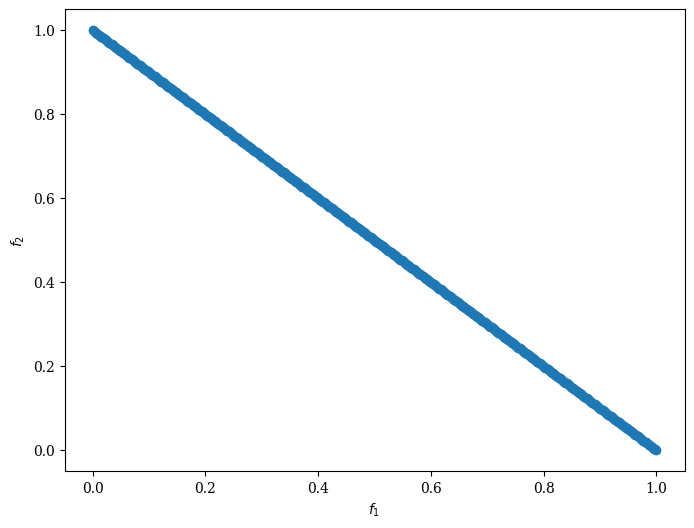

In [168]:
from pymoo.util.ref_dirs import get_reference_directions
from pymoo.visualization.scatter import Scatter

ref_dirs = get_reference_directions("energy", 2, 500, seed=1)

Scatter().add(ref_dirs).show()

In [183]:
def weighted_sum_approach(objective_vector,refference_vector):
    weighted_sum = np.dot(objective_vector,refference_vector)
    #print(refference_vector)
    return weighted_sum


def evaluate_obj1(x1,x2):
    return (x1)**3 + (x2)**2

def evaluate_obj2(x1,x2):
    return (x2)**2 - 4*(x1)

def scalarizing_function_weighted_sum(x,weights):
    x1,x2=x
    z_ideal = [-1000,-40]
    z_nadir = [1000,40]
    objective_vector = [evaluate_obj1(x1,x2),evaluate_obj2(x1,x2)]
    objective_vector_normalized = [(objective_vector[0]-z_ideal[0])/(z_nadir[0]-z_ideal[0]),
                                   (objective_vector[1]-z_ideal[1])/(z_nadir[1]-z_ideal[1])]
    
    #print('Objective Vector is {0} and scalar value is {1} '.format(objective_vector_normalized,
    #evaluate_chebyshev(objective_vector_normalized,[0.5, 0.5])))
    return weighted_sum_approach(objective_vector_normalized,weights)


In [187]:
results = []
bounds = [(-10,10),(-10,10)]
for i in range(len(ref_dirs)):
    results.append(optimize.differential_evolution(scalarizing_function_weighted_sum,bounds=bounds,args=([ref_dirs[i]])))
#results.append(res)

In [189]:
objective_weightedsums = []
for i in results:
    objective_weightedsums.append([evaluate_obj1(i.x[0],i.x[1]),evaluate_obj2(i.x[0],i.x[1])])

In [224]:
# creation of the scalarizing function

def evaluate_chebyshev(objective_vector,refference_vector):
    ideal_vector = [0,0]
    chebyshev_eval = []
    for i in range(len(objective_vector)):
        chebyshev_eval.append(refference_vector[i]*(objective_vector[i]-ideal_vector[i]))
    return max(chebyshev_eval)

def evaluate_obj1(x1,x2):
    return (x1)**3 + (x2)**2

def evaluate_obj2(x1,x2):
    return (x2)**2 - 4*(x1)

def scalarizing_function(x,weight):
    x1,x2 = x
    z_ideal = [-1000,-40]
    z_nadir = [1000,40]
    objective_vector = [evaluate_obj1(x1,x2),evaluate_obj2(x1,x2)]
    objective_vector_normalized = [(objective_vector[0]-z_ideal[0])/(z_nadir[0]-z_ideal[0]),
                                   (objective_vector[1]-z_ideal[1])/(z_nadir[1]-z_ideal[1])]
    
        #print('Objective Vector is {0} and scalar value is {1} '.format(objective_vector_normalized,
                                                                    #evaluate_chebyshev(objective_vector_normalized,[0.5, 0.5])))
    return evaluate_chebyshev(objective_vector_normalized,weight)



In [225]:
results_2 = []
bounds = [(-10,10),(-10,10)]
for i in range(len(ref_dirs)):
    results_2.append(optimize.differential_evolution(scalarizing_function,bounds=bounds,args=([ref_dirs[i]])))

In [226]:
objective_chebyshevsums = []
for i in results_2:
    objective_chebyshevsums.append([evaluate_obj1(i.x[0],i.x[1]),evaluate_obj2(i.x[0],i.x[1])])

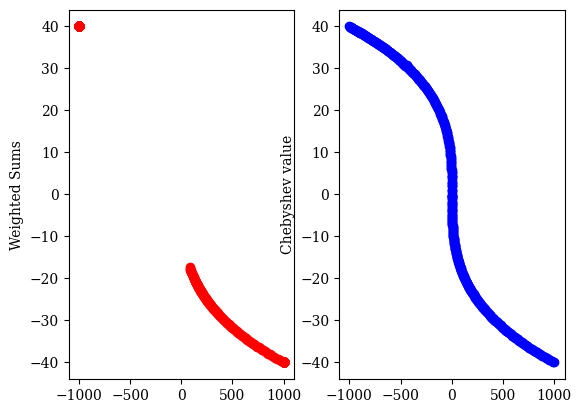

In [227]:
results_1x = [i[0] for i in objective_weightedsums ]
results_1y = [i[1] for i in objective_weightedsums]
results_2x = [i[0] for i in objective_chebyshevsums ]
results_2y = [i[1] for i in objective_chebyshevsums]
plt.subplot(1,2,1);plt.scatter(results_1x,results_1y,color='red');plt.ylabel('Weighted Sums')
plt.subplot(1,2,2);plt.scatter(results_2x,results_2y,color='blue');plt.ylabel('Chebyshev value')
plt.show()

In [228]:
def achievement_scalarizing_function(objective_vector,z_nadir,z_ideal,z_desirable):
    values = []
    for i in range(len(objective_vector)):
        values.append((objective_vector[i]-z_desirable[i])/(z_nadir[i]-z_ideal[i]))
    return np.max(values,axis=0)

def evaluate_obj1(x1,x2):
    return (x1)**3 + (x2)**2

def evaluate_obj2(x1,x2):
    return (x2)*2 - 4*(x1)


def scalarizing_function(x):
    x1,x2 = x
    z_ideal = [-1000,-40]
    z_nadir = [1000,40]
    z_desirable=[-750,20]
    objective_vector = [evaluate_obj1(x1,x2),evaluate_obj2(x1,x2)]
        #print('Objective Vector is {0} and scalar value is {1} '.format(objective_vector_normalized,
                                                                    #evaluate_chebyshev(objective_vector_normalized,[0.5, 0.5])))
    return achievement_scalarizing_function(objective_vector,z_nadir,z_ideal,z_desirable)


In [229]:
bounds=[(-10,10),(-10,10)]
res_5 = optimize.differential_evolution(scalarizing_function,bounds=bounds)

In [230]:
print('Decision vector corresponding to the optimal soln is {0} and its objective vector is {1}'.format(res_5.x,
                                                                            [evaluate_obj1(res_5.x[0],res_5.x[1])
                                                                             ,evaluate_obj2(res_5.x[0],res_5.x[1])]))

Decision vector corresponding to the optimal soln is [-9.61395179 -9.99978486] and its objective vector is [-788.6033019624302, 18.456237436812142]


In [231]:
def achievement_scalarizing_function(objective_vector,z_nadir,z_ideal,z_desirable):
    values = []
    for i in range(len(objective_vector)):
        values.append((objective_vector[i]-z_desirable[i])/(z_nadir[i]-z_ideal[i]))
    return np.max(values,axis=0)

def evaluate_obj1(x1,x2):
    return (x1)**3 + (x2)**2

def evaluate_obj2(x1,x2):
    return (x2)**2 - 4*(x1)


def scalarizing_function(x):
    x1,x2 = x
    z_ideal = [-1000,-40]
    z_nadir = [1000,40]
    z_desirable=[500,20]
    objective_vector = [evaluate_obj1(x1,x2),evaluate_obj2(x1,x2)]
        #print('Objective Vector is {0} and scalar value is {1} '.format(objective_vector_normalized,
                                                                    #evaluate_chebyshev(objective_vector_normalized,[0.5, 0.5])))
    return achievement_scalarizing_function(objective_vector,z_nadir,z_ideal,z_desirable)


In [232]:
bounds=[(-10,10),(-10,10)]
res_6 = optimize.differential_evolution(scalarizing_function,bounds=bounds)

In [233]:
print('Decision vector corresponding to the optimal soln is {0} and its objective vector is {1}'.format(res_6.x,
                                                                            [evaluate_obj1(res_6.x[0],res_6.x[1])
                                                                             ,evaluate_obj2(res_6.x[0],res_6.x[1])]))

Decision vector corresponding to the optimal soln is [0.03105329 0.0433019 ] and its objective vector is [0.0019049997070472585, -0.12233812491546242]
